In [299]:
import numpy as np
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.datasets import make_blobs

In [300]:
data = make_blobs(n_samples=300, 
                  n_features=2,
                  centers=2,
                  cluster_std=1.0,
                  random_state=101)

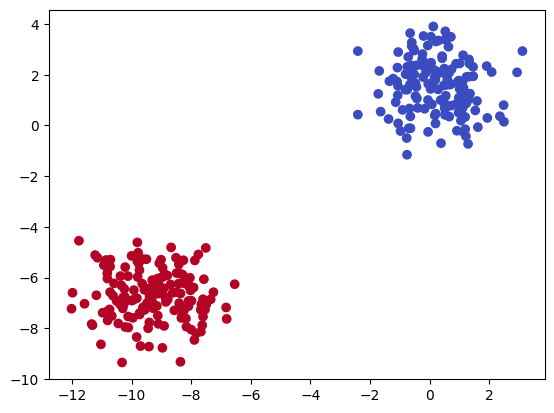

In [301]:
X, y = data
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')

In [302]:
np.random.seed(101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)
z_noise

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
         ...   
295    1.523750
296    1.290230
297   -1.478319
298    0.214234
299   -0.240510
Length: 300, dtype: float64

In [303]:
feat = pd.DataFrame(X)
feat['z_noise'] = z_noise
feat.columns = ['X1', 'X2', 'X3']
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


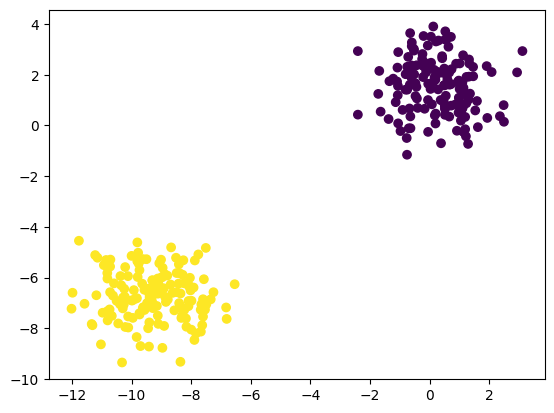

In [304]:
plt.scatter(feat['X1'], feat['X2'], c=y)

In [305]:
from mpl_toolkits.mplot3d import Axes3D

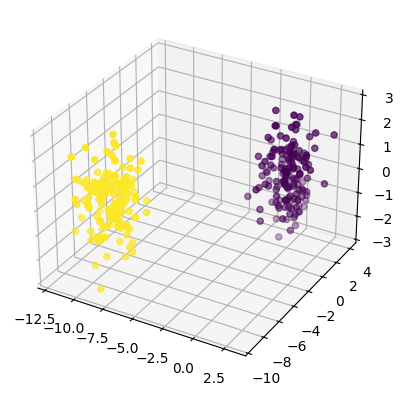

In [306]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'], feat['X2'], feat['X3'], c=y)
plt.show()

In [307]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


In [308]:
encoder = Sequential()
encoder.add(Dense(units=2, activation='relu', input_shape=[3]))

/Users/berk/dev/ml-hw2/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [309]:
decoder = Sequential()
decoder.add(Dense(units=3, activation='relu', input_shape=[2]))

In [310]:
autoencoder = Sequential([encoder, decoder])

In [311]:
autoencoder.compile(loss='mse', optimizer=SGD(learning_rate=1.5))

In [312]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


In [313]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [314]:
autoencoder.fit(scaled_data, scaled_data, epochs=20)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2354 
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1512
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1889
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1531
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1362
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1538
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1401
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1330
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1346
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 0.1386
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 0.1392
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 0.1451
Epoch 13/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1400
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.1421
Epoch 15/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 0.1372
Epoch 16

In [315]:
encoded_2dim = encoder.predict(scaled_data)
encoded_2dim.shape

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


(300, 2)

In [316]:
scaled_data.shape

(300, 3)

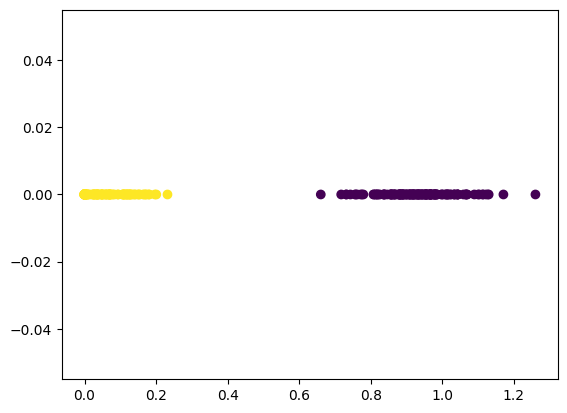

In [317]:
plt.scatter(encoded_2dim[:,0], encoded_2dim[:,1], c=y) 
